In [4]:
import pymc as pm
import arviz as az
import numpy as np

In [2]:
def normal_sim(rng, a, b, size=1000):
    return rng.normal(a, b, size=size)

In [5]:
data = np.random.normal(loc=0, scale=1, size=1000)

In [6]:
with pm.Model() as example:
        a = pm.Normal("a", mu=0, sigma=5)
        b = pm.HalfNormal("b", sigma=1)
        s = pm.Simulator("s", normal_sim, params=(a, b), sum_stat="sort", epsilon=1, observed=data)

        idata = pm.sample_smc()
        idata.extend(pm.sample_posterior_predictive(idata))

Initializing SMC sampler...
Sampling 12 chains in 12 jobs


Sampling: [s]


array([[<AxesSubplot: title={'center': 'a'}>,
        <AxesSubplot: title={'center': 'a'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot: title={'center': 'b'}>,
        <AxesSubplot: title={'center': 'b'}, xlabel='Rank (all chains)'>]],
      dtype=object)

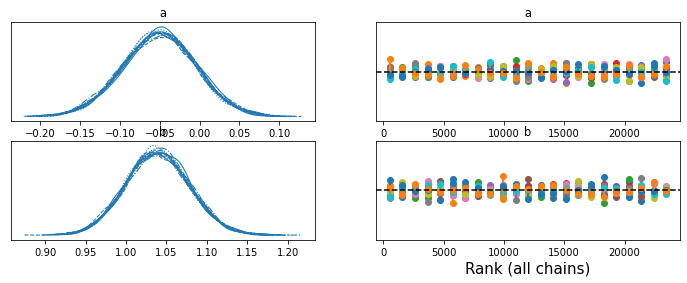

In [7]:
az.plot_trace(idata, kind="rank_vlines")

In [8]:
az.summary(idata, kind="stats")

,mean,sd,hdi_3%,hdi_97%
a,-0.051,0.046,-0.135,0.039
b,1.039,0.039,0.966,1.113


<AxesSubplot: xlabel='s / s'>

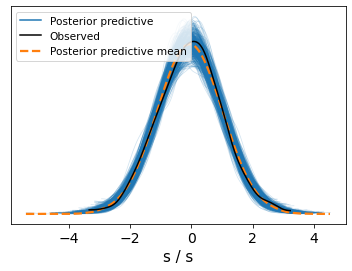

In [9]:
az.plot_ppc(idata, num_pp_samples=500)